In [1]:
import numpy as np 
from qiskit import *

from qiskit.visualization import plot_histogram

In [2]:
def dj_oracle(case,n):
    # plus one qubit for phase oracle implementation
    oracle_qc = QuantumCircuit(n+1)
    
    #balanced oracle
    if case == 'balanced':
        for qubit in range(n):
            # parity check
            oracle_qc.cx(qubit,n)
    if case == 'constant':
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [3]:
def dj_algorithm(n,case = 'random'):
    dj_circuit = QuantumCircuit(n+1,n)
    #first input register
    for qubit in range(n):
        dj_circuit.h(qubit)
    #set output register
    dj_circuit.x(n)
    dj_circuit.h(n)
    #appending the oracle gate
    if case == 'random':
        random = np.random.randint(2)
        if random == 0:
            case == 'constant'
        else:
            case == 'balanced'
    oracle = dj_oracle(case,n)
    dj_circuit.append(oracle,range(n+1))
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i,i)
    return dj_circuit

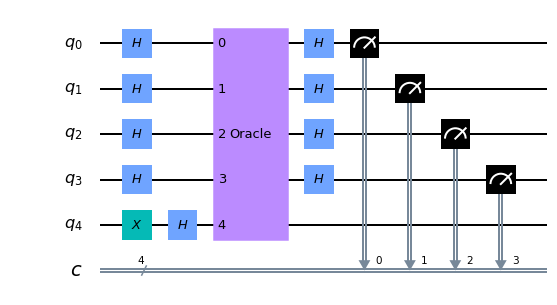

In [18]:
n = 4
dj_circuit = dj_algorithm(n)
dj_circuit.draw('mpl')

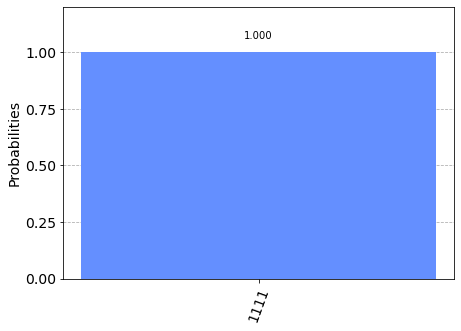

In [5]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n,'balanced')
results = execute(dj_circuit,backend).result()
answer = results.get_counts()

plot_histogram(answer)

In [17]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-10-06 18:09:24,506: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider('ibm-q')

In [20]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [ ]:
job = execute(dj_circuit,backend = qcomp,shots = shots)

In [11]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


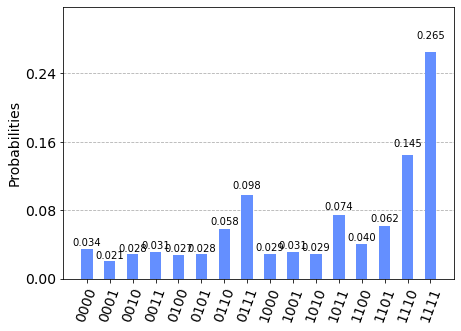

In [14]:
result = job.result()
plot_histogram(result.get_counts())